In [1]:
import os
import glob

import numpy as np

import itk

import site
site.addsitedir("../ARGUS")

from ARGUS_Timing import *
from ARGUS_IO import *

from ARGUS_onsd_ar_inference import ARGUS_onsd_ar_inference
from ARGUS_onsd_roi_inference import ARGUS_onsd_roi_inference

In [2]:
onsd_ar = ARGUS_onsd_ar_inference(config_file_name="../ARGUS/ARGUS_onsd_ar.cfg", network_name="final", device_num=0)
onsd_roi = ARGUS_onsd_roi_inference()

In [3]:
onsd_ar_best_models = [[0,0]]
onsd_ar.num_models = len(onsd_ar_best_models)

for i,r in enumerate(onsd_ar_best_models):
    model_name = os.path.join("Results", "onsd_vfold_run"+str(r[0]), "best_model_"+str(r[1])+".pth")
    onsd_ar.load_model(i, model_name)

In [15]:
vids = glob.glob("./Data_ONSD/original/Positives/*/*mp4")
           
vid = ARGUS_load_video(vids[3])

In [17]:
print(vid.shape)

(250, 1080, 912)


In [18]:
onsd_ar.volume_preprocess(vid)

In [19]:
img = onsd_ar.input_image
img_size = img.GetLargestPossibleRegion().GetSize()

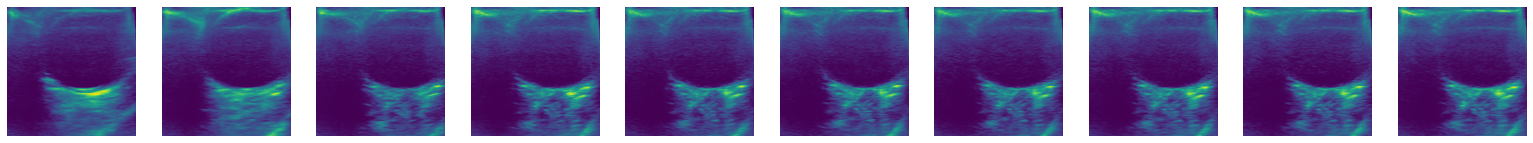

In [20]:
import matplotlib.pyplot as plt
from scipy.ndimage import rotate

num_slices = img.shape[0]
plt.figure(figsize=[30, 30])
step = num_slices//10
for c in range(0,num_slices,step):
    plt.subplot(
        1,
        11,
        c//step + 1,
    )
    plt.axis('off')
    plt.imshow(rotate(img[c, :, :],270))
plt.show()

In [21]:
labels = onsd_ar.volume_inference(step=2)

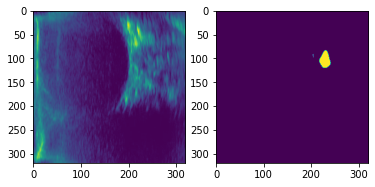

In [22]:
plt.subplot(1,2,1)
plt.imshow(img[170])
#(np.mean(labels,axis=0)))
plt.subplot(1,2,2)
plt.imshow((labels[170]))

In [23]:
classification, width, min_l, max_l = onsd_roi.inference(img, labels)

In [24]:
print(classification, width, min_l, max_l)

1 [5.42920418 5.42920418] [71 71] [86 88]
